In [3]:
import mysql.connector
from mysql.connector import errorcode
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import geopandas as gpd

In [6]:
try:
    cnx = mysql.connector.connect(
        user="root",
        password="Kjhglkjhg3.",
        database="CS306",
        auth_plugin="mysql_native_password",
    )
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)

/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_21938/956551192.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query1, cnx)
/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_21938/956551192.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame2 = pd.read_sql(query2, cnx)


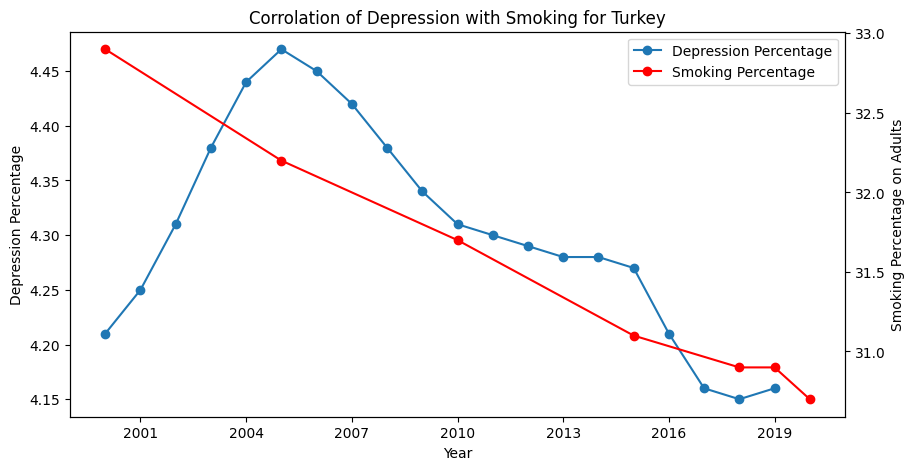

In [5]:
query1 = "SELECT mental_health_stat_year as year, depression_rate FROM m_disorder WHERE country_code = 'TUR' AND mental_health_stat_year >= 2000;"
query2 = " SELECT smoker_stat_year as year, percentage_among_all_adults FROM smoker WHERE country_code = 'TUR' AND smoker_stat_year >= 2000;"

dataFrame = pd.read_sql(query1, cnx)
dataFrame2 = pd.read_sql(query2, cnx)

fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
line1 = ax1.plot(dataFrame["year"], dataFrame["depression_rate"], marker = "o")

ax1.set_xlabel("Year")
ax1.set_ylabel("Depression Percentage")
ax1.set_title("Corrolation of Depression with Smoking for Turkey")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = ax1.twinx()
line2 = ax2.plot(dataFrame2["year"], dataFrame2["percentage_among_all_adults"], color = "red", marker = "o")
ax2.set_ylabel("Smoking Percentage on Adults")

lines = line1 + line2
ax1.legend(lines,["Depression Percentage","Smoking Percentage"])

plt.savefig("First Graph.png")
plt.show()

/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_27909/203628572.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query1, cnx)
/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_27909/203628572.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame2 = pd.read_sql(query2, cnx)


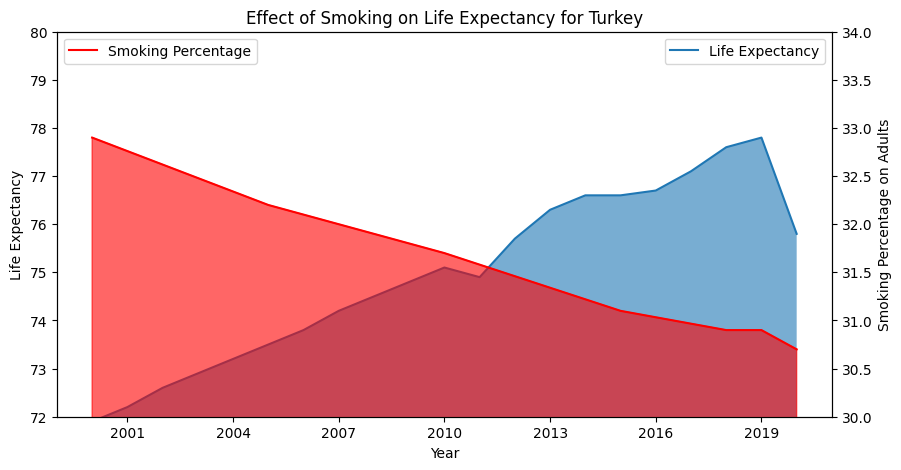

In [51]:
query1 = "SELECT pop_year as year, life_exp FROM population WHERE country_code = 'TUR' AND pop_year >= 2000 and pop_year <= 2020"
query2 = " SELECT smoker_stat_year as year, percentage_among_all_adults FROM smoker WHERE country_code = 'TUR' AND smoker_stat_year >= 2000;"

dataFrame = pd.read_sql(query1, cnx)
dataFrame2 = pd.read_sql(query2, cnx)

fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
line1 = ax1.plot(dataFrame["year"], dataFrame["life_exp"], alpha = 1)
ax1.fill_between(dataFrame["year"],dataFrame["life_exp"], alpha = 0.6)
ax1.set_ylim((72,80))

ax1.set_xlabel("Year")
ax1.set_ylabel("Life Expectancy")
ax1.set_title("Effect of Smoking on Life Expectancy for Turkey")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = ax1.twinx()
line2 = ax2.plot(dataFrame2["year"], dataFrame2["percentage_among_all_adults"], color = "red", alpha = 1)
ax2.fill_between(dataFrame2["year"], dataFrame2["percentage_among_all_adults"], color = "red", alpha = 0.6)
ax2.set_ylabel("Smoking Percentage on Adults")
ax2.set_ylim((30,34))

lines = line1 + line2
ax1.legend(["Life Expectancy"])
ax2.legend(["Smoking Percentage"],loc = 2)

plt.savefig("Second Graph.png")
plt.show()

/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_21938/289672781.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query1, cnx)


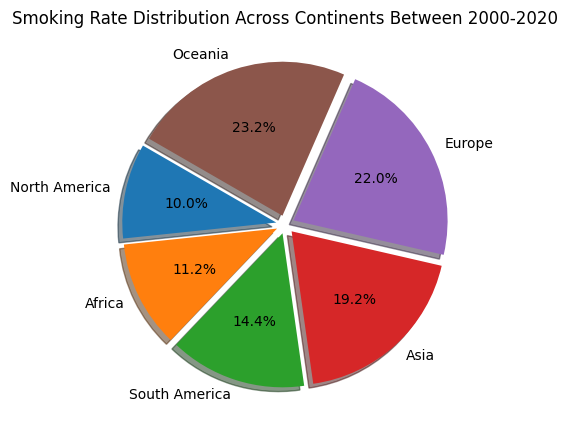

In [63]:
query1 = "Select continent_name as CN, Average from continent inner join (select continent_code as CC, AVG(percentage_among_all_adults) as Average from (select located.continent_code, smoker.percentage_among_all_adults from smoker inner join located on smoker.country_code = located.country_code) as joined group by joined.continent_code) as joined2 on continent.continent_code = joined2.CC ORDER BY Average;"

dataFrame = pd.read_sql(query1, cnx)

plt.figure(figsize=(10,5))
plt.pie(dataFrame["Average"], labels = dataFrame["CN"], autopct='%1.1f%%', explode=[0.06,0.06,0.06,0.06,0.06,0.06], shadow=True , startangle=150)

plt.title("Smoking Rate Distribution Across Continents Between 2000-2020")


plt.savefig("Third Graph.png")
plt.show()




/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_27909/4035274247.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query1, cnx)
/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_27909/4035274247.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


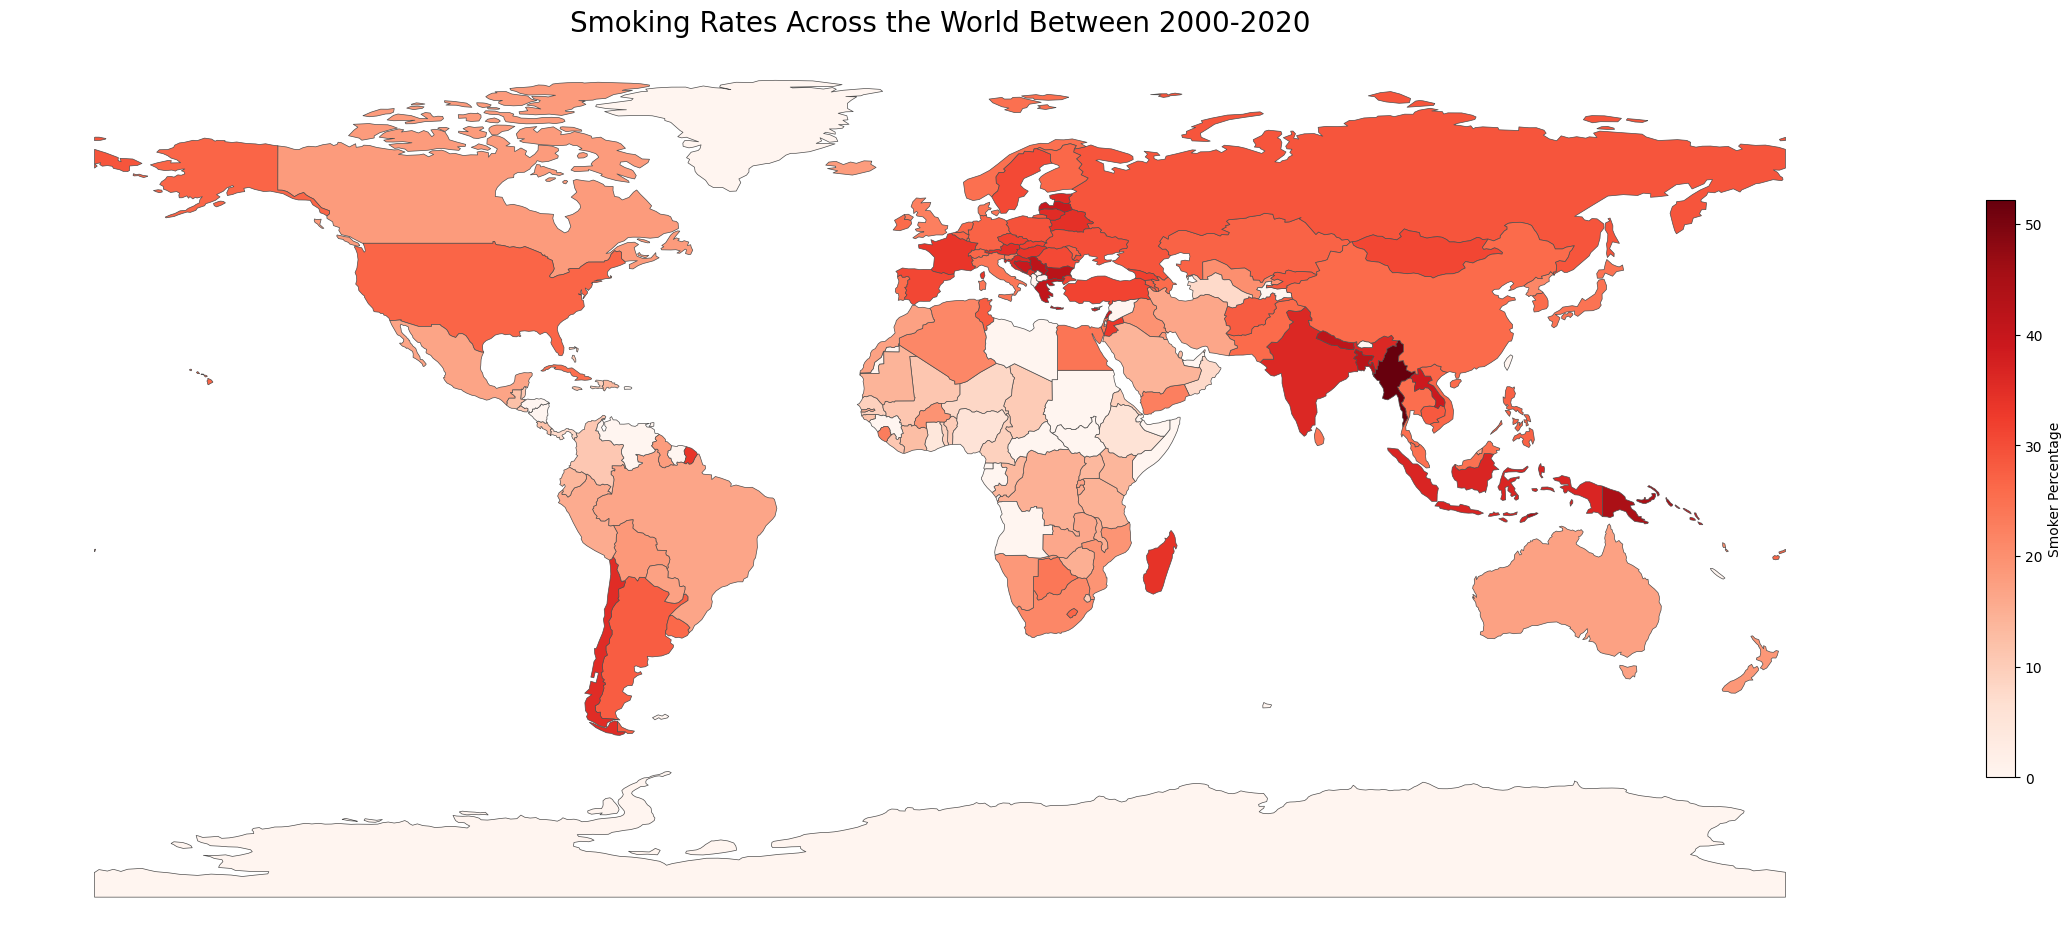

In [42]:
query1 = "select country_code, AVG(percentage_among_all_adults) as data_to_display from smoker group by country_code;"
dataFrame = pd.read_sql(query1, cnx)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(dataFrame, left_on='iso_a3', right_on='country_code', how = "left")
merged['data_to_display'] = merged['data_to_display'].fillna(0)

fig, ax = plt.subplots(figsize=(30, 15))
ax.set_title('Smoking Rates Across the World Between 2000-2020', size = 20)
ax.set_axis_off()
merged.plot(column='data_to_display', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.3', legend=True, legend_kwds={'shrink': 0.5, 'label':'Smoker Percentage'})

plt.savefig("Forth Graph")
plt.show()


/var/folders/6h/gvys4t150zzcqq_s8gp_6f7r0000gn/T/ipykernel_27909/3100228181.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query, cnx)


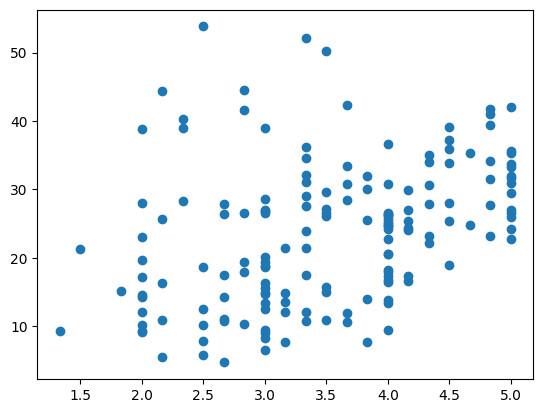

In [52]:
query = "select a.country_code, tax, smoke from (select AVG(percentage_increase_tobacco) as tax, country_code from taxes group by country_code order by tax desc) as a INNER JOIN (select country_code, AVG(percentage_among_all_adults) as smoke from smoker group by country_code) as b on a.country_code = b.country_code;"
dataFrame = pd.read_sql(query, cnx)

plt.scatter(dataFrame["tax"], dataFrame["smoke"])
plt.show()